In [8]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import silhouette_score
from clust_plot_ld import PLSData as plls

In [36]:
data = pd.read_csv("ShippingData.csv")

In [180]:
# Group the data by DAY and CONTAINER_TYPE_CODE
grouped = data.groupby(['DAY', 'CONTAINER_TYPE_CODE'])

# Count the number of rows in each group
counts = grouped.size()

# Convert the grouped data into a DataFrame and reset the index
day_container_data = counts.reset_index()

# Rename the count column to CONTAINER_COUNT for clarity
day_container_data.rename(columns={0: 'CONTAINER_COUNT'}, inplace=True)

# Display the resulting DataFrame
print(day_container_data)

          DAY CONTAINER_TYPE_CODE  CONTAINER_COUNT
0      Monday                  HC              110
1      Monday                 HRF               14
2      Monday                  OS                0
3      Monday                  OT                0
4      Monday                 REF                0
5      Monday                 STD               58
6      Monday                 TNK                0
7     Tuesday                  HC              128
8     Tuesday                 HRF               14
9     Tuesday                  OS                1
10    Tuesday                  OT                1
11    Tuesday                 REF                2
12    Tuesday                 STD               43
13    Tuesday                 TNK                0
14  Wednesday                  HC               86
15  Wednesday                 HRF               17
16  Wednesday                  OS                0
17  Wednesday                  OT                1
18  Wednesday                 R

C:\Users\2104035361\AppData\Local\Temp\ipykernel_21380\368783847.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(['DAY', 'CONTAINER_TYPE_CODE'])


In [182]:
day_container_pivot = day_container_data.pivot(index='DAY', columns='CONTAINER_TYPE_CODE', values='CONTAINER_COUNT').fillna(0)

In [184]:
print(day_container_pivot)

CONTAINER_TYPE_CODE   HC  HRF  OS  OT  REF  STD  TNK
DAY                                                 
Monday               110   14   0   0    0   58    0
Tuesday              128   14   1   1    2   43    0
Wednesday             86   17   0   1    0   54    0
Thursday             130   10   0   1    0   66    0
Friday                97   14   0   0    0   68    0
Saturday              21    1   0   2    0   18    0
Sunday                10    8   0   0    0   17    8


In [190]:
# Encode days of the week as numbers for easier clustering
day_container_pivot['DAY_NUM'] = day_container_pivot.index.map({
    'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3,
    'Friday': 4, 'Saturday': 5, 'Sunday': 6
})
day_container_pivot = day_container_pivot.sort_values('DAY_NUM').drop(columns=['DAY_NUM'])

In [192]:
print(day_container_pivot)

CONTAINER_TYPE_CODE   HC  HRF  OS  OT  REF  STD  TNK
DAY                                                 
Monday               110   14   0   0    0   58    0
Tuesday              128   14   1   1    2   43    0
Wednesday             86   17   0   1    0   54    0
Thursday             130   10   0   1    0   66    0
Friday                97   14   0   0    0   68    0
Saturday              21    1   0   2    0   18    0
Sunday                10    8   0   0    0   17    8


In [194]:
# Standardize the data
scaler = StandardScaler()
day_container_scaled = scaler.fit_transform(day_container_pivot)

In [196]:
day_container_scaled

array([[ 0.59336411,  0.57495957, -0.40824829, -1.02062073, -0.40824829,
         0.59367318, -0.40824829],
       [ 0.99104431,  0.57495957,  2.44948974,  0.40824829,  2.44948974,
        -0.16651809, -0.40824829],
       [ 0.06312384,  1.17866713, -0.40824829,  0.40824829, -0.40824829,
         0.39095551, -0.40824829],
       [ 1.035231  , -0.22998383, -0.40824829,  0.40824829, -0.40824829,
         0.99910852, -0.40824829],
       [ 0.30615063,  0.57495957, -0.40824829, -1.02062073, -0.40824829,
         1.10046736, -0.40824829],
       [-1.37294355, -2.04110649, -0.40824829,  1.83711731, -0.40824829,
        -1.43350353, -0.40824829],
       [-1.61597034, -0.63245553, -0.40824829, -1.02062073, -0.40824829,
        -1.48418295,  2.44948974]])

In [10]:
plls(day_container_scaled, ["feature1", "feature2"], ["Cluster1", "Cluster2", "Cluster3", "Cluster4", "Cluster5", "Cluster6", "Cluster7"])

NameError: name 'day_container_scaled' is not defined

In [198]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 8):  # Test from 1 to 8 clusters
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(day_container_scaled)
    wcss.append(kmeans.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

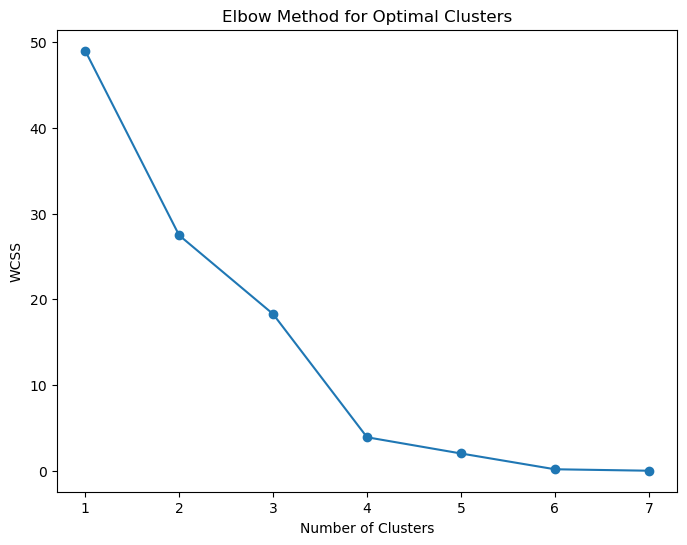

In [200]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 8), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

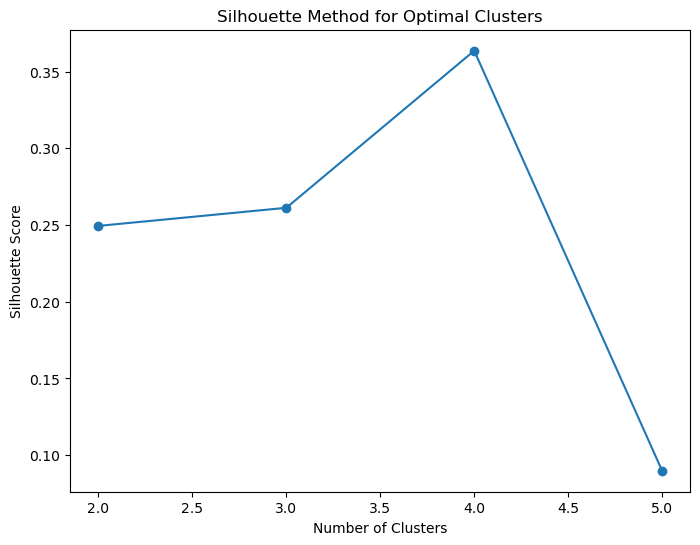

In [204]:
silhouette_scores = []
for i in range(2, 6):  # Minimum of 2 clusters required for silhouette score
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(day_container_scaled)
    score = silhouette_score(day_container_scaled, cluster_labels)
    silhouette_scores.append(score)

# Plot the Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 6), silhouette_scores, marker='o')
plt.title('Silhouette Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\2104035361\AppData\Local\Temp\ipykernel_21380\1120913474.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day_container_pivot, x='DAY', y='CLUSTER', palette='viridis')


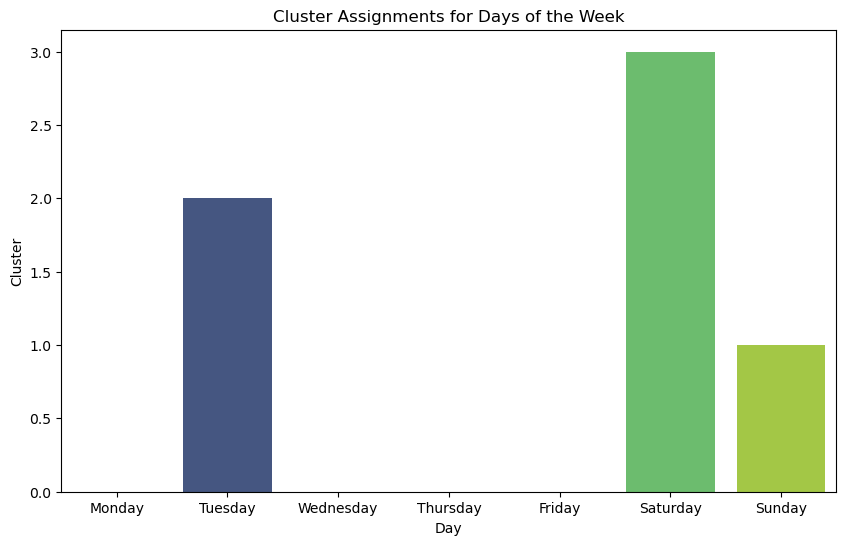

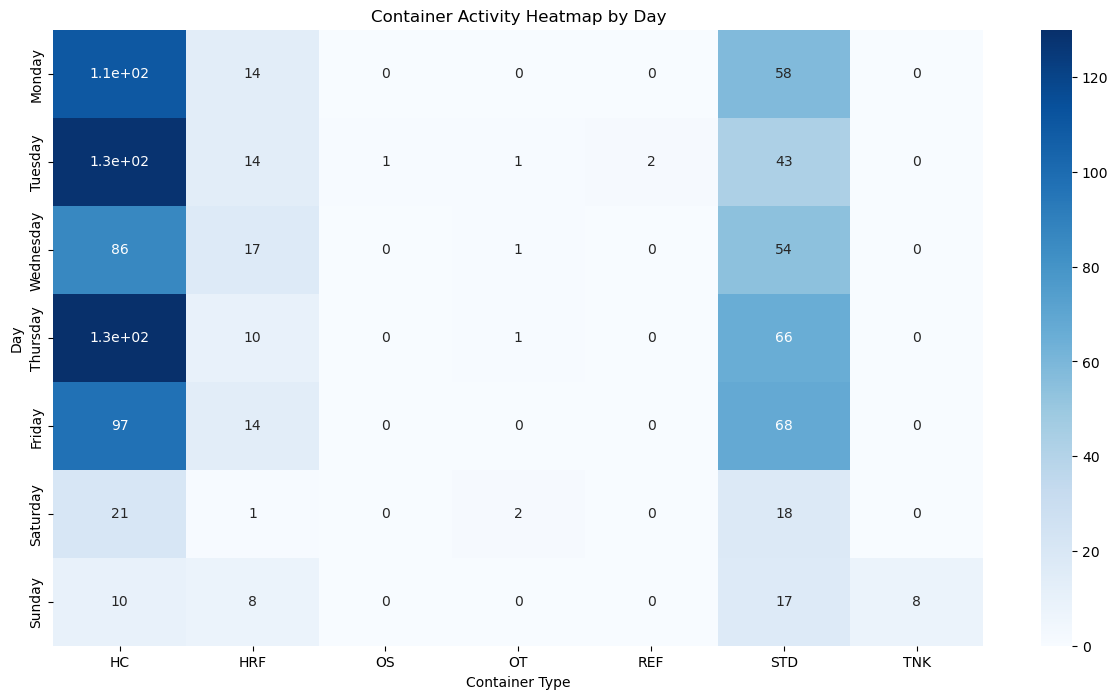

In [206]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
day_container_pivot['CLUSTER'] = kmeans.fit_predict(day_container_scaled)

# Add the clusters back to the original day mapping
day_container_pivot.reset_index(inplace=True)

# Visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(data=day_container_pivot, x='DAY', y='CLUSTER', palette='viridis')
plt.title('Cluster Assignments for Days of the Week')
plt.xlabel('Day')
plt.ylabel('Cluster')
plt.show()

# Heatmap of container activity across clusters
plt.figure(figsize=(15, 8))
sns.heatmap(day_container_pivot.drop(columns=['CLUSTER']).set_index('DAY'), annot=True, cmap='Blues')
plt.title('Container Activity Heatmap by Day')
plt.xlabel('Container Type')
plt.ylabel('Day')
plt.show()

In [90]:
# Define the custom order for days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a categorical type to enforce the order
data['DAY'] = pd.Categorical(data['DAY'], categories=day_order, ordered=True)

# Sort the dataset by day
data = data.sort_values(by="DAY")
data

,CONTAINER_ID,LINE_CODE,CONTAINER_DATE,DATE,DAY,TIME,AM/PM,CONTAINER_TYPE_CODE,CONTAINER_TYPE,CONTAINER_ISO_CODE,CONTAINER_LENGTH,CONTAINER_HEIGHT,CONTAINER_WIDTH,VENTILATION,DANGEROUS_TRANSPORT,DESIGNATION_CODE,DESIGNATION
276,REGU5112640,RCL,9/23/2024 08:55:00 AM,9/23/2024,Monday,8:55:00,AM,HC,High Cubed,4500,40,9'6'',8,No Ventilation,No,MT,Empty
296,SKLU2341311,SMMC,9/23/2024 09:44:00 AM,9/23/2024,Monday,9:44:00,AM,STD,Standard,2200,20,8'6'',8,No Ventilation,No,MT,Empty
297,UETU2210815,OOCL,9/23/2024 08:39:00 AM,9/23/2024,Monday,8:39:00,AM,STD,Standard,22G1,20,8'6'',8,No Ventilation,No,MT,Empty
298,NIDU2354935,HLL,9/23/2024 04:42:00 PM,9/23/2024,Monday,4:42:00,PM,STD,Standard,22G1,20,8'6'',8,No Ventilation,No,MT,Empty
299,CMAU4581119,CMA,9/23/2024 08:28:00 PM,9/23/2024,Monday,8:28:00,PM,HC,High Cubed,45G1,40,9'6'',8,No Ventilation,No,MT,Empty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,TCNU3208462,MSK,10/6/2024 03:53:00 PM,10/6/2024,Sunday,3:53:00,PM,HC,High Cubed,45G1,40,9'6'',8,No Ventilation,No,EXP,Export Service
836,BSIU2174436,HLL,10/6/2024 05:10:00 PM,10/6/2024,Sunday,5:10:00,PM,STD,Standard,22G1,20,8'6'',8,No Ventilation,No,EXP,Export Service
973,IGAU0221890,SMMC,10/13/2024 10:37:00 AM,10/13/2024,Sunday,10:37:00,AM,TNK,Tank,22K3,20,8'6'',8,Pressurized,Yes,MT,Empty
975,IGAU0220532,SMMC,10/13/2024 10:42:00 AM,10/13/2024,Sunday,10:42:00,AM,TNK,Tank,22T6,20,8'6'',8,Pressurized,No,MT,Empty


In [84]:
# Create a numeric target for each unique day
day_mapping = {day: idx for idx, day in enumerate(day_order)}

In [86]:
day_mapping

{'Monday': 0,
 'Tuesday': 1,
 'Wednesday': 2,
 'Thursday': 3,
 'Friday': 4,
 'Saturday': 5,
 'Sunday': 6}

In [92]:
data['DAY_NUMERIC_TARGET'] = data['DAY'].map(day_mapping)

In [94]:
data

,CONTAINER_ID,LINE_CODE,CONTAINER_DATE,DATE,DAY,TIME,AM/PM,CONTAINER_TYPE_CODE,CONTAINER_TYPE,CONTAINER_ISO_CODE,CONTAINER_LENGTH,CONTAINER_HEIGHT,CONTAINER_WIDTH,VENTILATION,DANGEROUS_TRANSPORT,DESIGNATION_CODE,DESIGNATION,DAY_NUMERIC_TARGET
276,REGU5112640,RCL,9/23/2024 08:55:00 AM,9/23/2024,Monday,8:55:00,AM,HC,High Cubed,4500,40,9'6'',8,No Ventilation,No,MT,Empty,0
296,SKLU2341311,SMMC,9/23/2024 09:44:00 AM,9/23/2024,Monday,9:44:00,AM,STD,Standard,2200,20,8'6'',8,No Ventilation,No,MT,Empty,0
297,UETU2210815,OOCL,9/23/2024 08:39:00 AM,9/23/2024,Monday,8:39:00,AM,STD,Standard,22G1,20,8'6'',8,No Ventilation,No,MT,Empty,0
298,NIDU2354935,HLL,9/23/2024 04:42:00 PM,9/23/2024,Monday,4:42:00,PM,STD,Standard,22G1,20,8'6'',8,No Ventilation,No,MT,Empty,0
299,CMAU4581119,CMA,9/23/2024 08:28:00 PM,9/23/2024,Monday,8:28:00,PM,HC,High Cubed,45G1,40,9'6'',8,No Ventilation,No,MT,Empty,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,TCNU3208462,MSK,10/6/2024 03:53:00 PM,10/6/2024,Sunday,3:53:00,PM,HC,High Cubed,45G1,40,9'6'',8,No Ventilation,No,EXP,Export Service,6
836,BSIU2174436,HLL,10/6/2024 05:10:00 PM,10/6/2024,Sunday,5:10:00,PM,STD,Standard,22G1,20,8'6'',8,No Ventilation,No,EXP,Export Service,6
973,IGAU0221890,SMMC,10/13/2024 10:37:00 AM,10/13/2024,Sunday,10:37:00,AM,TNK,Tank,22K3,20,8'6'',8,Pressurized,Yes,MT,Empty,6
975,IGAU0220532,SMMC,10/13/2024 10:42:00 AM,10/13/2024,Sunday,10:42:00,AM,TNK,Tank,22T6,20,8'6'',8,Pressurized,No,MT,Empty,6


In [96]:
# Extract hour from 'TIME' and create time blocks
data['HOUR'] = pd.to_datetime(data['TIME'], format='%H:%M:%S').dt.hour
data['TIME_BLOCK'] = pd.cut(
    data['HOUR'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'], right=False
)

In [98]:
data

,CONTAINER_ID,LINE_CODE,CONTAINER_DATE,DATE,DAY,TIME,AM/PM,CONTAINER_TYPE_CODE,CONTAINER_TYPE,CONTAINER_ISO_CODE,CONTAINER_LENGTH,CONTAINER_HEIGHT,CONTAINER_WIDTH,VENTILATION,DANGEROUS_TRANSPORT,DESIGNATION_CODE,DESIGNATION,DAY_NUMERIC_TARGET,HOUR,TIME_BLOCK
276,REGU5112640,RCL,9/23/2024 08:55:00 AM,9/23/2024,Monday,8:55:00,AM,HC,High Cubed,4500,40,9'6'',8,No Ventilation,No,MT,Empty,0,8,Morning
296,SKLU2341311,SMMC,9/23/2024 09:44:00 AM,9/23/2024,Monday,9:44:00,AM,STD,Standard,2200,20,8'6'',8,No Ventilation,No,MT,Empty,0,9,Morning
297,UETU2210815,OOCL,9/23/2024 08:39:00 AM,9/23/2024,Monday,8:39:00,AM,STD,Standard,22G1,20,8'6'',8,No Ventilation,No,MT,Empty,0,8,Morning
298,NIDU2354935,HLL,9/23/2024 04:42:00 PM,9/23/2024,Monday,4:42:00,PM,STD,Standard,22G1,20,8'6'',8,No Ventilation,No,MT,Empty,0,4,Night
299,CMAU4581119,CMA,9/23/2024 08:28:00 PM,9/23/2024,Monday,8:28:00,PM,HC,High Cubed,45G1,40,9'6'',8,No Ventilation,No,MT,Empty,0,8,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,TCNU3208462,MSK,10/6/2024 03:53:00 PM,10/6/2024,Sunday,3:53:00,PM,HC,High Cubed,45G1,40,9'6'',8,No Ventilation,No,EXP,Export Service,6,3,Night
836,BSIU2174436,HLL,10/6/2024 05:10:00 PM,10/6/2024,Sunday,5:10:00,PM,STD,Standard,22G1,20,8'6'',8,No Ventilation,No,EXP,Export Service,6,5,Night
973,IGAU0221890,SMMC,10/13/2024 10:37:00 AM,10/13/2024,Sunday,10:37:00,AM,TNK,Tank,22K3,20,8'6'',8,Pressurized,Yes,MT,Empty,6,10,Morning
975,IGAU0220532,SMMC,10/13/2024 10:42:00 AM,10/13/2024,Sunday,10:42:00,AM,TNK,Tank,22T6,20,8'6'',8,Pressurized,No,MT,Empty,6,10,Morning


In [100]:
hour_time_block_mapping = data[['HOUR', 'TIME_BLOCK']].drop_duplicates().sort_values(by='HOUR')

In [102]:
hour_time_block_mapping

,HOUR,TIME_BLOCK
321,1,Night
309,2,Night
312,3,Night
298,4,Night
264,5,Night
558,6,Morning
314,7,Morning
276,8,Morning
296,9,Morning
310,10,Morning
